# Canny Edges Detection

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : January 2020


In [76]:
import os
import re
import numpy as np

In [77]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [78]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [79]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import Angle
from astropy import units as u

In [80]:
from math import ceil,floor
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import astropy
from astropy.visualization.mpl_normalize import (ImageNormalize,MinMaxInterval,PercentileInterval,SqrtStretch,LogStretch)
from astropy.visualization.wcsaxes import SphericalCircle

In [81]:
from astropy.wcs import WCS

In [82]:
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier

In [83]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(8,8)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [84]:
import sys
sys.path.append("../..")
sys.path.append("../../FeaturesExtractor")
sys.path.append("../../FeaturesExtractor/features")

In [85]:
from FeaturesExtractor.config import *
from FeaturesExtractor.features.images import *
from FeaturesExtractor.features.features import *
from FeaturesExtractor.tools import *
from FeaturesExtractor import parameters

In [86]:
from skimage import feature

In [87]:
from skimage.feature import peak_local_max


# Input file

In [88]:
inputfile="../../tests/data/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red.fit"

In [89]:
configfile='../../config/picdumidi.ini'

# Start

In [90]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [91]:
#--------- Start Logger
my_logger = set_logger("TestCannyEdgesDetection")
my_logger.info('\n\tStart TestCannyEdgesDetection')

2020-01-08 17:08:49  TestCannyEdgesDetection <module>             INFO   
	Start TestCannyEdgesDetection


In [92]:
#--------- Load config file ---------------
load_config(configfile)

In [93]:
#-------- Load reduced image
image = Image(inputfile)

2020-01-08 17:08:49  Image      load_image           INFO   
	Image in file  ../../tests/data/T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red.fit loaded


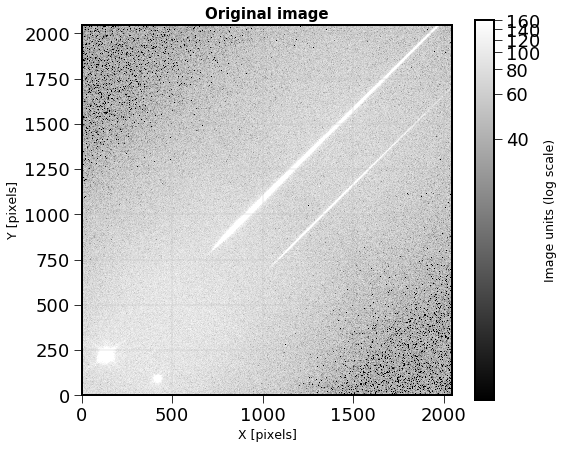

In [94]:
#if parameters.DEBUG and parameters.FLAG_PLOT_IMG :
if parameters.DEBUG  :
    image.plot_image(scale='log',title="Original image",cmap=plt.cm.gray)

In [95]:
#-----------------------------------------------------------------------------------------------------------
# Process the whole image by calculating Hessian, and its Eigen values images (lambda_plus and lambda_minus) and theta as well
#-----------------------------------------------------------------------------------------------------------
image.process_image()

2020-01-08 17:08:50  Image      process_image        INFO   
	Size of original image (Nx,Ny) = (2048,2048)
2020-01-08 17:08:50  Image      process_image        INFO   
	Size of processed image (Nx,Ny) = (2046,2046)
2020-01-08 17:08:50  Image      process_image        INFO   
	Padding of processed image (Xpad,Ypad)  = (1,1)
2020-01-08 17:08:50  Image      process_image        INFO   
	Image processed


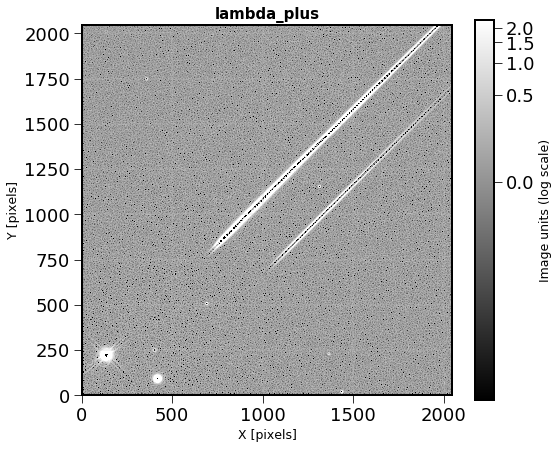

In [96]:
#if parameters.DEBUG and parameters.FLAG_PLOT_LAMBDA_PLUS:
if parameters.DEBUG :
    image.plot_image(img_type="lambda_p",scale='log',title="lambda_plus",cmap=plt.cm.gray)


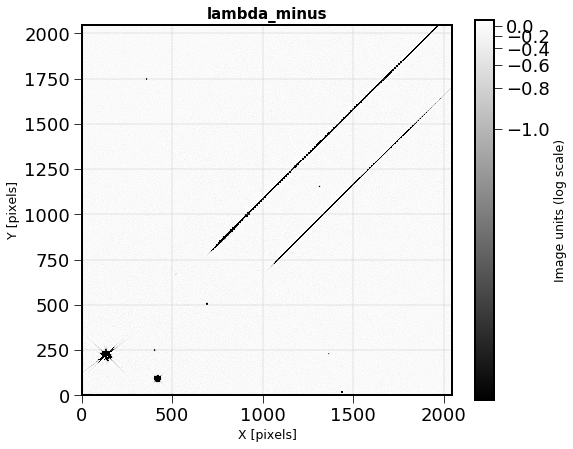

In [97]:
#if parameters.DEBUG and parameters.FLAG_PLOT_LAMBDA_MINUS:
if parameters.DEBUG:
    image.plot_image(img_type="lambda_m", scale='log', title="lambda_minus",cmap=plt.cm.gray)

In [98]:
# ----------------------------------------------------------------------------------------------------------
# Clip Minimal and maximal values inside the images
#------------------------------------------------------------------------------------------------------------
image.clip_images()

2020-01-08 17:08:51  Image      clip_images          INFO   
	Images clipped


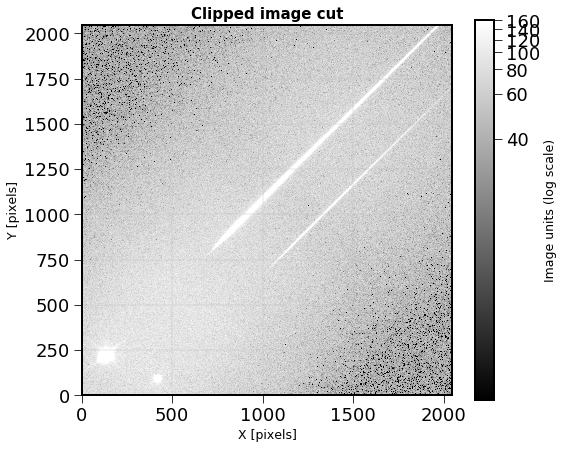

In [99]:
#if parameters.DEBUG and parameters.FLAG_PLOT_IMG_CLIP:
if parameters.DEBUG :
    image.plot_image(img_type="img_cut",scale='log',title="Clipped image cut",cmap=plt.cm.gray)

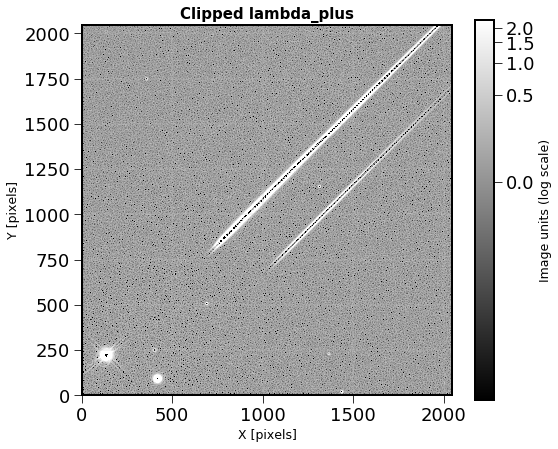

In [100]:
#if parameters.DEBUG and parameters.FLAG_PLOT_LAMBDA_PLUS_CLIP:
if parameters.DEBUG :
    image.plot_image(img_type="lambda_p_cut",scale='log',title="Clipped lambda_plus",cmap=plt.cm.gray)  

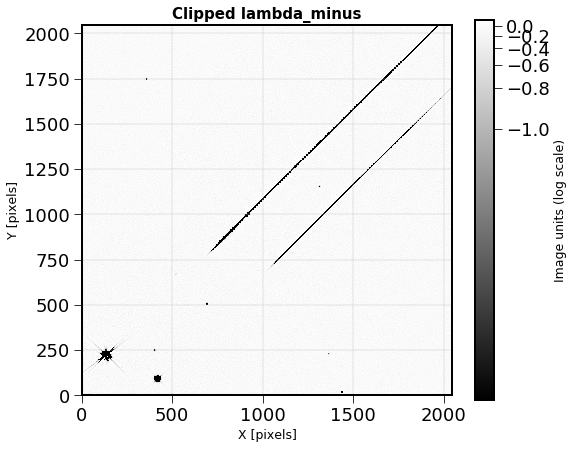

In [101]:
#if parameters.DEBUG and parameters.FLAG_PLOT_LAMBDA_MINUS_CLIP:
if parameters.DEBUG :
    image.plot_image(img_type="lambda_m_cut", scale='log', title="Clipped lambda_minus",cmap=plt.cm.gray)

In [102]:
#-------------------------------------------------------------------------------------------------------------
# Calculate edges inside the images on lambda_plus and lambda_minus
#-------------------------------------------------------------------------------------------------------------
image.compute_edges()   

2020-01-08 17:08:54  Image      compute_edges        INFO   
	Images edges computed


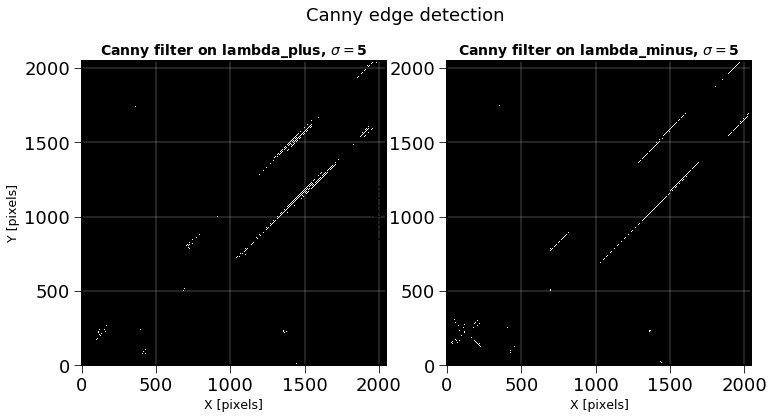

In [103]:
if parameters.DEBUG and ( parameters.FLAG_PLOT_LAMBDA_MINUS_EDGES or parameters.FLAG_PLOT_LAMBDA_PLUS_EDGES):
    image.plot_edges()

# Work with lambda\_minus

In [104]:
lambda_minus=np.copy(image.img_cube[parameters.IndexImg.lambda_minus])
#lambda_minus=np.copy(image.img_cube[parameters.IndexImg.lambda_minus_clip])

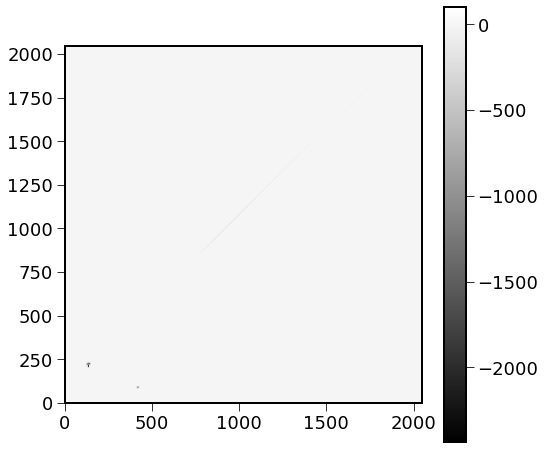

In [105]:
img=plt.imshow(lambda_minus,origin="lower",cmap="gray")
plt.colorbar(img)

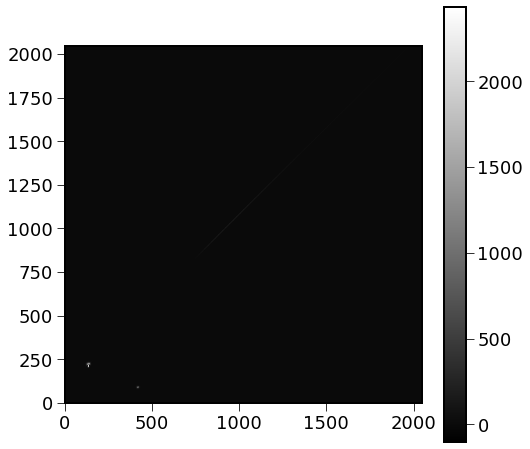

In [106]:
img=plt.imshow(-lambda_minus,origin="lower",cmap="gray")
plt.colorbar(img)

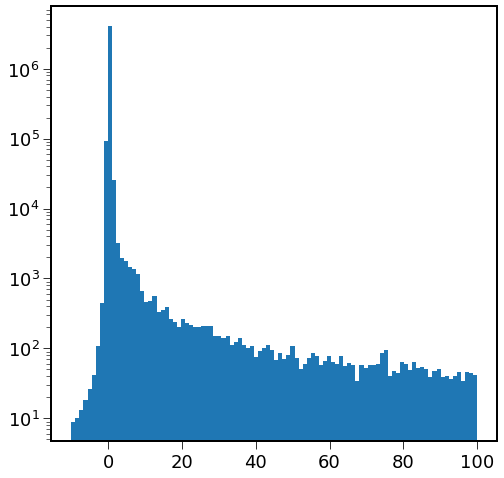

In [107]:
plt.hist(-lambda_minus.flatten(),bins=100,range=(-10,100));
plt.yscale('log')

# algo
https://stackoverflow.com/questions/9111711/get-coordinates-of-local-maxima-in-2d-array-above-certain-value

In [110]:
#xy = peak_local_max(data, min_distance=2,threshold_abs=1500)

- documentation

https://en.wikipedia.org/wiki/Canny_edge_detector

In [111]:
# feature.canny?

In [112]:
LOW_TH = np.array([0.1 , 0.3  , 0.5 , 0.7 , 0.9 ])

In [113]:
all_HIGH_TH= []
MAX_X = 0
for th in LOW_TH:
    HIGH_TH = np.arange(th+0.2,1,0.2)
    if MAX_X < len(HIGH_TH):
        MAX_X =  len(HIGH_TH)
    if(len(HIGH_TH)>0 ):
        all_HIGH_TH.append(HIGH_TH)

In [114]:
all_HIGH_TH

[array([0.3, 0.5, 0.7, 0.9]),
 array([0.5, 0.7, 0.9]),
 array([0.7, 0.9]),
 array([0.9])]

In [115]:
arr_HIGH_TH = np.array(all_HIGH_TH)

In [116]:
np.concatenate(arr_HIGH_TH) 

array([0.3, 0.5, 0.7, 0.9, 0.5, 0.7, 0.9, 0.7, 0.9, 0.9])

In [118]:
NY = len(LOW_TH)
NX = MAX_X 
N  = len(np.concatenate(arr_HIGH_TH)) 

In [119]:
N

10

In [120]:
NX

4

In [121]:
NY

5

In [ ]:
count=0
for iy in np.arange(len(NY)):
    for ix in np.arange(len(all_HIGH_TH[iy]))
    
        th_low=LOW_TH[iy]
        th_high=all_HIGH_TH[iy][ix]
        
        index=iy*MAX_X+ix
        
        plt.subplot(NX,NY,indx)
        

In [ ]:
edges= feature.canny(-lambda_minus, low_threshold=0.9,high_threshold=0.9,sigma=parameters.SIGMA_EDGE,use_quantiles=True)

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(edges,origin="lower",cmap="gray")
plt.grid(color="w")